In [6]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [39]:
star_name = "GJ1243"

# This query returns all obserations across all missions centered on our target.
observations = Observations.query_object(star_name, radius = "0 deg")
# Create a filter that will only pick out the observations we want: TESS timeseries missions from Sectors 13 and
# below.
obs_wanted = ((observations['dataproduct_type'] == 'timeseries') &
              (observations['obs_collection'] == 'TESS') &
             (observations['sequence_number'] <= 13))
# Print out a few columns to show what we have selected. Note that TESS multi-Sector observations are assigned
# a sequence_number based on the last Sector used in the range.
print(observations[obs_wanted]['obs_collection', 'project', 'obs_id', 'sequence_number'])

obs_collection project obs_id sequence_number
-------------- ------- ------ ---------------


/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_42278/3213760385.py:5: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  res = search_lightcurvefile("TIC 273589987", mission='TESS')   # busca productos


SearchResult containing 38 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019      SPOC     120   273589987      0.0
  1 TESS Sector 15 2019      SPOC     120   273589987      0.0
  2 TESS Sector 41 2021      SPOC      20   273589987      0.0
  3 TESS Sector 41 2021      SPOC     120   273589987      0.0
  4 TESS Sector 54 2022      SPOC      20   273589987      0.0
  5 TESS Sector 55 2022      SPOC      20   273589987      0.0
  6 TESS Sector 54 2022      SPOC     120   273589987      0.0
  7 TESS Sector 55 2022      SPOC     120   273589987      0.0
  8 TESS Sector 82 2024      SPOC      20   273589987      0.0
  9 TESS Sector 75 2024      SPOC      20   273589987      0.0
 10 TESS Sector 81 2024      SPOC      20   273589987      0.0
 11 TESS Sector 74 2024      SPOC      20   273589987      0.0
 12 TESS Sec

/Users/rubencarcamo/miniconda3/envs/tesis/lib/python3.13/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 38 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_42278/3213760385.py:10: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcfile.PDCSAP_FLUX  # o .SAP_FLUX


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

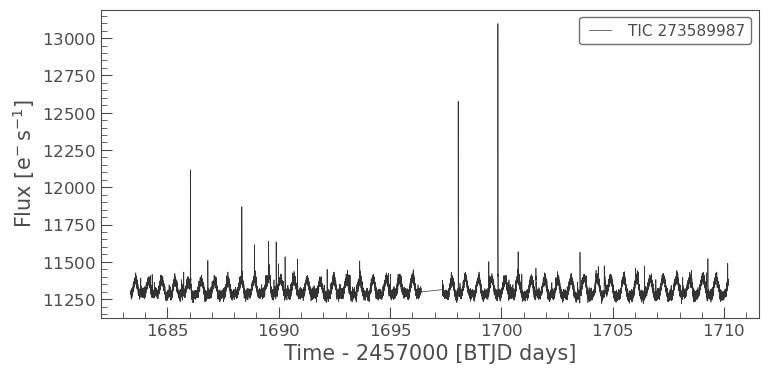

In [40]:
from lightkurve import search_lightcurvefile

# usa un TIC ID o nombre
# ejemplo: "TIC 307210830" o "L98-59" (si lo reconoce)
res = search_lightcurvefile("TIC 273589987", mission='TESS')   # busca productos
print(res)  # ver qué sectores/meshes están disponibles

# descargar el archivo (2-min target)
lcfile = res.download(quality_bitmask='hard')   # descarga el TESS LC file
lc = lcfile.PDCSAP_FLUX  # o .SAP_FLUX
lc.plot()


In [10]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
dvt_file = "https://archive.stsci.edu/missions/tess/tid/s0002/0000/0001/0010/0827/tess2018235142541-s0002-s0002-0000000100100827-00109_dvt.fits"

In [18]:
fits.info(dvt_file)

Filename: /Users/rubencarcamo/.astropy/cache/download/url/b7a964102cf8214206e44685a7596beb/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   ()      
  1  TCE_1         1 BinTableHDU     92   19737R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   19737R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  Statistics    1 BinTableHDU    157   19737R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [22]:
fits.getdata(dvt_file, ext=3).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'sigma'; disp = 'E14.7'
    name = 'RESIDUAL_LC'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'DEWEIGHTS'; format = 'E'; unit = 'proportion'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'SES_CORR_0_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_1_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_1_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_2_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_2_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_3_0'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_3_5'; format = 'E'; disp = 'E14.7'
    name = 'SES_CORR_4_5'; format = 'E'; disp = 'E14.7'


In [23]:
with fits.open(dvt_file, mode="readonly") as hdulist:
    
    # Extract stellar parameters from the primary header.  We'll get the effective temperature, surface gravity,
    # and TESS magnitude.
    star_teff = hdulist[0].header['TEFF']
    star_logg = hdulist[0].header['LOGG']
    star_tmag = hdulist[0].header['TESSMAG']
    
    # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
    # extension.
    period = hdulist[1].header['TPERIOD']
    duration = hdulist[1].header['TDUR']
    epoch = hdulist[1].header['TEPOCH']
    depth = hdulist[1].header['TDEPTH']
    
    # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
    # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
    # model fluxes.
    times = hdulist[1].data['TIME']
    phases = hdulist[1].data['PHASE']
    fluxes_init = hdulist[1].data['LC_INIT']
    model_fluxes_init = hdulist[1].data['MODEL_INIT']

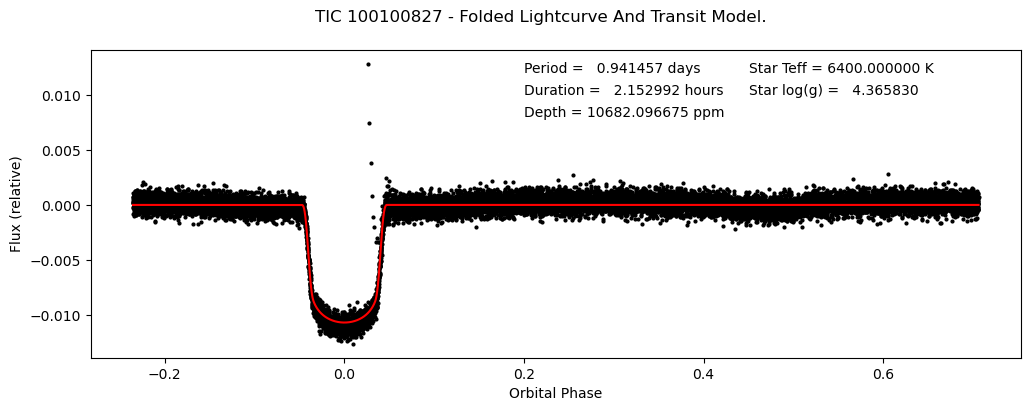

In [24]:
# First sort the phase and flux arrays by phase so we can draw the connecting lines between points.
sort_indexes = np.argsort(phases)

# Start figure and axis.
fig, ax = plt.subplots(figsize=(12,4))

# Plot the detrended fluxes as black circles.  We will plot them in sorted order.
ax.plot(phases[sort_indexes], fluxes_init[sort_indexes], 'ko',
       markersize=2)

# Plot the model fluxes as a red line.  We will plot them in sorted order so the line connects between points cleanly.
ax.plot(phases[sort_indexes], model_fluxes_init[sort_indexes], '-r')

# Let's label the axes and define a title for the figure.
fig.suptitle('TIC 100100827 - Folded Lightcurve And Transit Model.')
ax.set_ylabel("Flux (relative)")
ax.set_xlabel("Orbital Phase")

# Let's add some text in the top-right containing some of the fit parameters.
plt.text(0.2, 0.012, "Period = {0:10.6f} days".format(period))
plt.text(0.2, 0.010, "Duration = {0:10.6f} hours".format(duration))
plt.text(0.2, 0.008, "Depth = {0:10.6f} ppm".format(depth))
plt.text(0.45, 0.012, "Star Teff = {0:10.6f} K".format(star_teff))
plt.text(0.45, 0.010, "Star log(g) = {0:10.6f}".format(star_logg))

plt.show()

In [26]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
fits_file = 'https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2018292075959-s0004-0000000025155310-0124-s_lc.fits'

In [30]:
fits.info(fits_file)

Filename: /Users/rubencarcamo/.astropy/cache/download/url/e401e561c2d035b05ce5d894e252fcd9/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18684R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [27]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

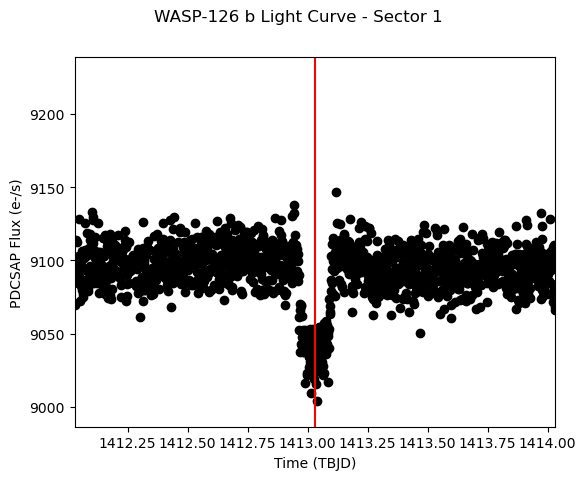

In [28]:
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
#t0 = 2037.895
t0 = 1413.03

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 1.0, t0 + 1.0)

# Overplot a red vertical line that should be where the transit occurs.
ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [34]:
# First we need to read in the array of cadence quality flags, let's do
# that now.
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['QUALITY']


class:  ndarray
shape:  (18684,)
strides:  (100,)
itemsize:  4
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x145c6bee8
byteorder:  big
byteswap:  True
type: >i4


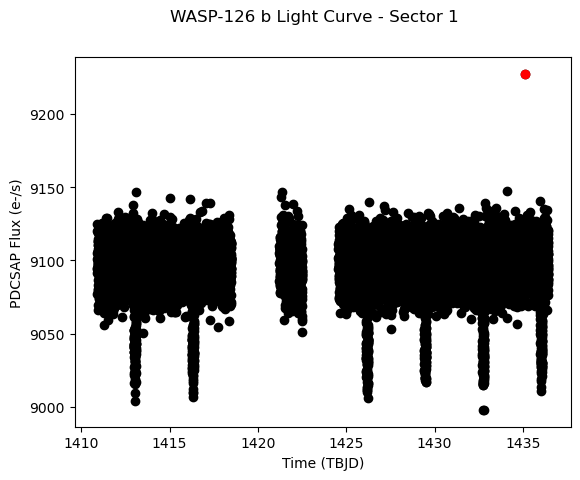

In [47]:
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(tess_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

## Search Stars

In [46]:
from astroquery.mast import Catalogs

result = Catalogs.query_object("GJ 1243", catalog="TIC")
print(result[0]['ID'])   # TIC ID


273589987


In [41]:
from lightkurve import search_lightcurvefile

# usa un TIC ID o nombre
# ejemplo: "TIC 307210830" o "L98-59" (si lo reconoce)
res = search_lightcurvefile("TIC 273589987", mission='TESS')   # busca productos
print(res)  # ver qué sectores/meshes están disponibles

# descargar el archivo (2-min target)
lcfile = res.download(quality_bitmask='hard')   # descarga el TESS LC file
lc = lcfile.PDCSAP_FLUX  # o .SAP_FLUX
lc.plot()


/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_64863/3213760385.py:5: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  res = search_lightcurvefile("TIC 273589987", mission='TESS')   # busca productos
/Users/rubencarcamo/miniconda3/envs/tesis/lib/python3.13/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 38 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_64863/3213760385.py:10: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcfile.PDCSAP_FLUX  # o .SAP_FLUX


SearchResult containing 38 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019      SPOC     120   273589987      0.0
  1 TESS Sector 15 2019      SPOC     120   273589987      0.0
  2 TESS Sector 41 2021      SPOC      20   273589987      0.0
  3 TESS Sector 41 2021      SPOC     120   273589987      0.0
  4 TESS Sector 54 2022      SPOC      20   273589987      0.0
  5 TESS Sector 55 2022      SPOC      20   273589987      0.0
  6 TESS Sector 54 2022      SPOC     120   273589987      0.0
  7 TESS Sector 55 2022      SPOC     120   273589987      0.0
  8 TESS Sector 82 2024      SPOC      20   273589987      0.0
  9 TESS Sector 75 2024      SPOC      20   273589987      0.0
 10 TESS Sector 81 2024      SPOC      20   273589987      0.0
 11 TESS Sector 74 2024      SPOC      20   273589987      0.0
 12 TESS Sec

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [2]:
# Solution:
import lightkurve as lk
search_result = lk.search_lightcurve('TIC 273589987', mission='TESS')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,273589987,0.0
1,TESS Sector 15,2019,SPOC,120,273589987,0.0
2,TESS Sector 41,2021,SPOC,20,273589987,0.0
3,TESS Sector 41,2021,SPOC,120,273589987,0.0
4,TESS Sector 54,2022,SPOC,20,273589987,0.0
5,TESS Sector 55,2022,SPOC,20,273589987,0.0
6,TESS Sector 54,2022,SPOC,120,273589987,0.0
7,TESS Sector 55,2022,SPOC,120,273589987,0.0
8,TESS Sector 82,2024,SPOC,20,273589987,0.0


In [33]:
search_result_q2 = lk.search_lightcurve('TIC 273589987', mission='TESS', sector=14, exptime = 120)
search_result_q2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,273589987,0.0
1,TESS Sector 14,2019,TASOC,120,273589987,0.0


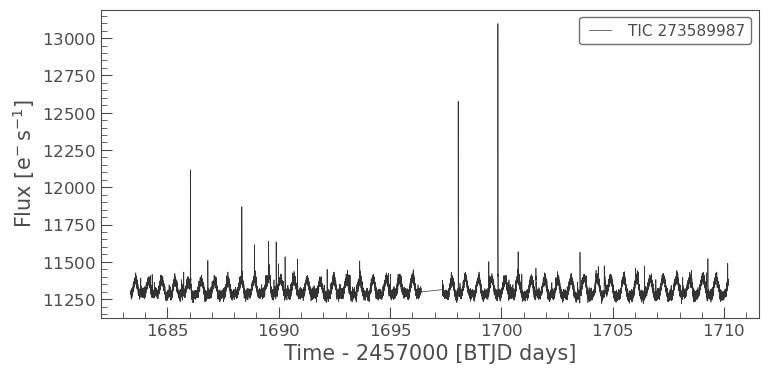

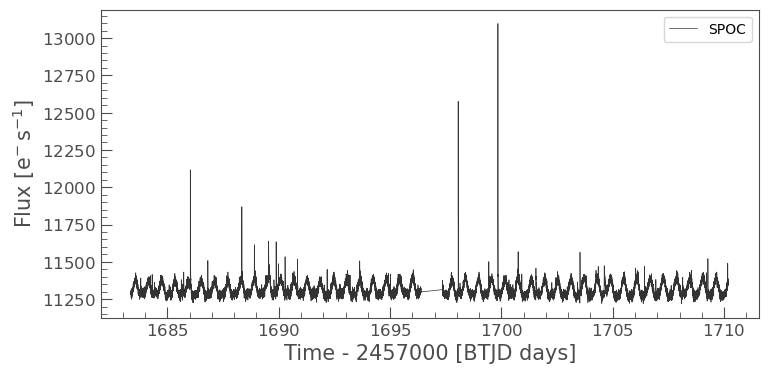

In [34]:
lc_s = search_result_q2[0].download()   # SPOC
lc_t = search_result_q2[1].download()   # TASOC



lc_s.plot(label="SPOC")
#lc_t.plot(label="TASOC")
plt.legend()
plt.show()


MaskedNDArray([ True,  True,  True, ...,  True,  True,  True],
              shape=(18424,))

In [44]:
lc["pdcsap_flux"].max()

<MaskedQuantity 13097.255 electron / s>

Amplitud máxima determinada: 1.0077530145645142


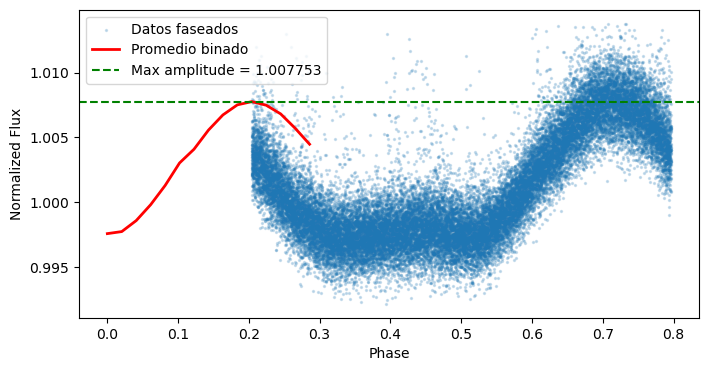

In [50]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. DESCARGA DE LOS SECTORES (SPOC recomendado)
# -------------------------------------------------------------
search14 = lk.search_lightcurve("TIC 273589987", mission="TESS", sector=14, exptime=120)
search15 = lk.search_lightcurve("TIC 273589987", mission="TESS", sector=15, exptime=120)

lc14 = search14[0].download()  # SPOC sector 14
lc15 = search15[0].download()  # SPOC sector 15

# -------------------------------------------------------------
# 2. LIMPIEZA BÁSICA (NaNs, quality flags)
# -------------------------------------------------------------
lc14 = lc14.remove_nans().remove_outliers(sigma=5)
lc15 = lc15.remove_nans().remove_outliers(sigma=5)

# Se recomienda eliminar flares de forma agresiva para GJ 1243
lc14 = lc14.remove_outliers(sigma=3)
lc15 = lc15.remove_outliers(sigma=3)

# -------------------------------------------------------------
# 3. NORMALIZACIÓN (para comparar sectores)
# -------------------------------------------------------------
lc14 = lc14.normalize()
lc15 = lc15.normalize()

# -------------------------------------------------------------
# 4. CONCATENAR SECTORES
# -------------------------------------------------------------
lc_all = lc14.append(lc15)

# -------------------------------------------------------------
# 5. FASEO ("phase folding")
# -------------------------------------------------------------
P = 0.59260  # periodo rotacional de GJ 1243 según Davenport+2015
t0 = lc_all.time[0].value  # referencia arbitraria

lc_phase = lc_all.fold(period=P, epoch_time=t0)

# -------------------------------------------------------------
# 6. BINNING (promedio por bins para suavizar)
# -------------------------------------------------------------
bins = 50  # puedes cambiarlo
bin_phases = np.linspace(0, 1, bins)
bin_flux = []

for i in range(bins - 1):
    mask = (lc_phase.phase.value >= bin_phases[i]) & (lc_phase.phase.value < bin_phases[i+1])
    if np.any(mask):
        bin_flux.append(np.mean(lc_phase.flux.value[mask]))
    else:
        bin_flux.append(np.nan)

bin_flux = np.array(bin_flux)

# -------------------------------------------------------------
# 7. AMPLITUD MÁXIMA (como hace el paper)
# -------------------------------------------------------------
max_amp = np.nanmax(bin_flux)
print("Amplitud máxima determinada:", max_amp)

# -------------------------------------------------------------
# 8. PLOT
# -------------------------------------------------------------
# Conversiones necesarias
phase = (lc_phase.phase.value + 0.5) % 1.0
# de TimeDelta a float
flux = lc_phase.flux.value

plt.figure(figsize=(8,4))
plt.scatter(phase, flux, s=2, alpha=0.2, label="Datos faseados")
plt.plot(bin_phases[:-1], bin_flux, color="red", linewidth=2, label="Promedio binado")
plt.axhline(max_amp, color="green", linestyle="--", label=f"Max amplitude = {max_amp:.6f}")

plt.xlabel("Phase")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()



Amplitud máxima: 1.007718801498413


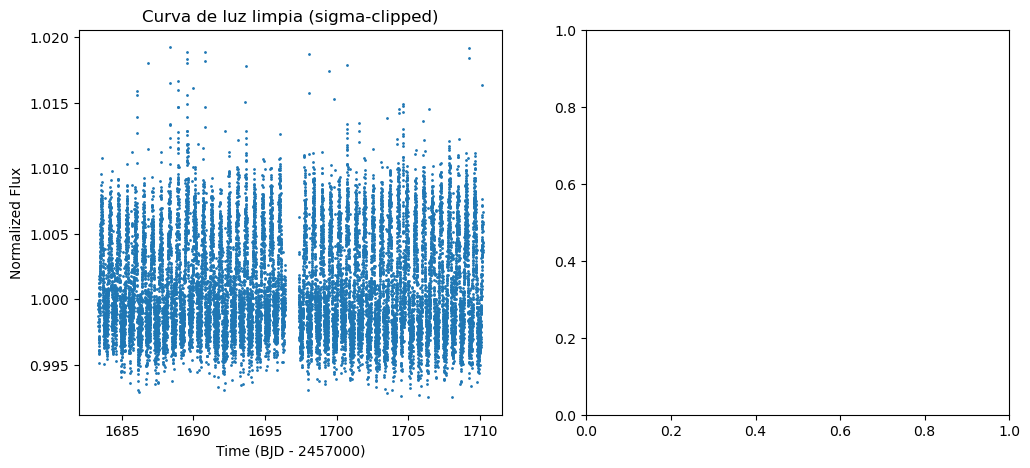

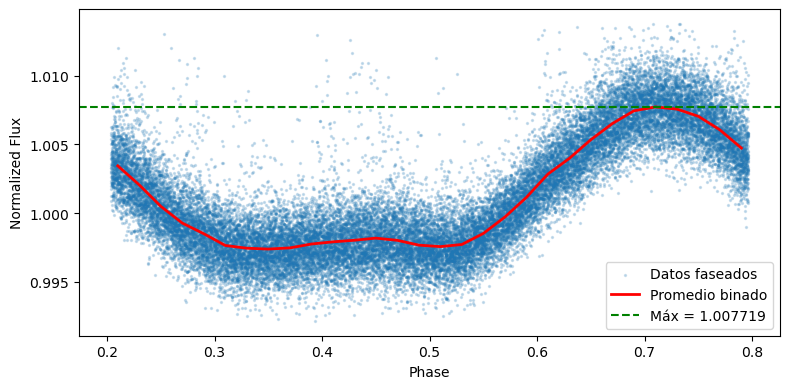

In [52]:
# -------------------------------------------------------------
# 5. FASEO ("phase folding") - versión limpia
# -------------------------------------------------------------
P = 0.59260  # periodo rotacional de GJ 1243
t0 = lc_all.time[0].value

lc_phase = lc_all.fold(period=P, epoch_time=t0)

# Convierte la fase a un array simple
phase = lc_phase.phase.value

# Re-mapea fase desde [-0.5,0.5] a [0,1)
phase = (phase + 0.5) % 1.0

# Ordena por fase  (¡MUY IMPORTANTE!)
order = np.argsort(phase)
phase = phase[order]
flux = lc_phase.flux.value[order]

# -------------------------------------------------------------
# 6. BINNING corregido
# -------------------------------------------------------------
bins = 50
bin_edges = np.linspace(0, 1, bins+1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

bin_flux = np.zeros(bins)

for i in range(bins):
    mask = (phase >= bin_edges[i]) & (phase < bin_edges[i+1])
    if np.any(mask):
        bin_flux[i] = np.mean(flux[mask])
    else:
        bin_flux[i] = np.nan

# -------------------------------------------------------------
# 7. AMPLITUD MÁXIMA
# -------------------------------------------------------------
max_amp = np.nanmax(bin_flux)
print("Amplitud máxima:", max_amp)

# -------------------------------------------------------------
# 8. PLOT ordenado y bonito
# -------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.scatter(phase, flux, s=2, alpha=0.2, label="Datos faseados")
plt.plot(bin_centers, bin_flux, '-', color="red", linewidth=2, label="Promedio binado")
plt.axhline(max_amp, color="green", linestyle="--", label=f"Máx = {max_amp:.6f}")

plt.xlabel("Phase")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()
plt.show()
